<a href="https://colab.research.google.com/github/paulosrl/AnaliseGrafos/blob/main/vers%C3%A3o_em_portugues_Aula_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Análise de rede usando Networkx

Rode este preâmbulo antes de tudo

MÉDIA DE GRAU: 2.0
Coeficiente Médio de Clustering: 0.0
Densidade do Gráfico (%): 2.0202020202020203
Grau do nó 15: 1
Coeficiente de agrupamento do nó 15: 0


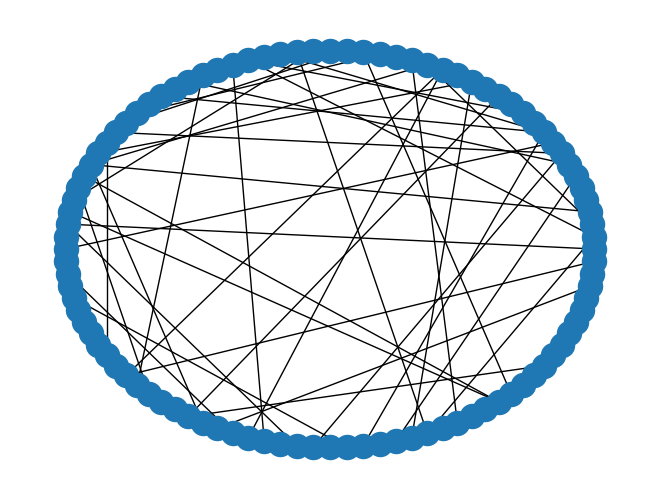

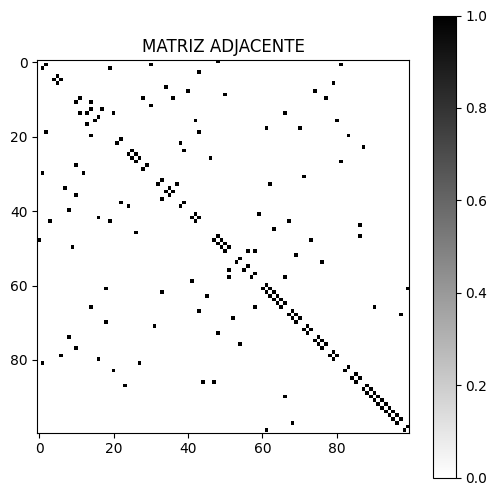

In [ ]:
import random
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

G1 = nx.connected_watts_strogatz_graph(100, 3, 0.5, tries=1000, seed=random.seed(0))
nx.draw(G1,with_labels=False,pos=nx.circular_layout(G1))

# Calcula o GRAU
degree_dict = dict(G1.degree())
average_degree = sum(degree_dict.values()) / len(degree_dict)

# Calcula o coeficiente de agrupamento
clustering_coefficient = nx.clustering(G1)
average_clustering_coefficient = sum(clustering_coefficient.values()) / len(clustering_coefficient)

# Calcula a densidade do gráfico
num_nodes = len(G1.nodes())
num_edges = len(G1.edges())
density = 100*2 * num_edges / (num_nodes * (num_nodes - 1))

print("MÉDIA DE GRAU:", average_degree)
print("Coeficiente Médio de Clustering:", average_clustering_coefficient)
print("Densidade do Gráfico (%):", density)

# Especifica o nó de interesse
node_of_interest = 15

# Calcula o grau do nó especificado
degree = G1.degree(node_of_interest)

# Calcula o coeficiente de agrupamento do nó especificado
clustering = nx.clustering(G1, node_of_interest)

print(f"Grau do nó {node_of_interest}: {degree}")
print(f"Coeficiente de agrupamento do nó {node_of_interest}: {clustering}")

# Calcula a matriz de adjacência
adj_matrix = nx.to_numpy_array(G1)

# Plota a matriz de adjacência
plt.figure(figsize=(6, 6))
plt.imshow(adj_matrix, cmap='binary', interpolation='none')
plt.title("MATRIZ ADJACENTE")
plt.colorbar()
plt.show()

Caracterização (densidade, clustering, número de vértices a arestas)

Comprimento médio do caminho mais curto: 11.838181818181818


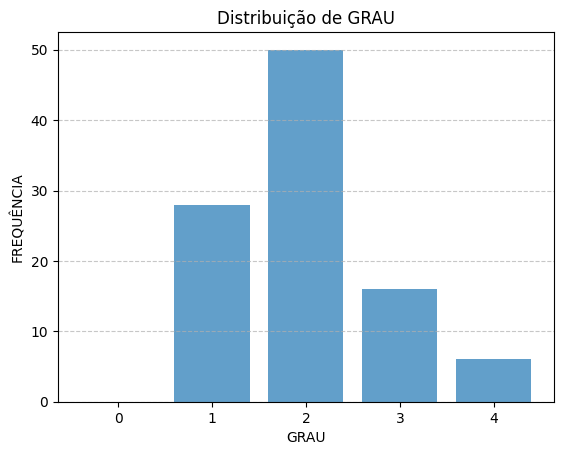

O gráfico aleatório está desconectado. Considere gerar um gráfico aleatório conectado.


In [ ]:
import random
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

G1 = nx.connected_watts_strogatz_graph(100, 3, 0.5, tries=1000, seed=random.seed(0))

# Calcula o comprimento médio do caminho mais curto
average_shortest_path_length = nx.average_shortest_path_length(G1)

print("Comprimento médio do caminho mais curto:", average_shortest_path_length)

# Calcula a distribuição de graus
degree_sequence = [d for n, d in G1.degree()]

# Plota a distribuição de graus
plt.hist(degree_sequence, bins=range(max(degree_sequence) + 2), align='left', alpha=0.7, rwidth=0.8)
plt.xlabel('GRAU')
plt.ylabel('FREQUÊNCIA')
plt.title('Distribuição de GRAU')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#Para determinar se uma rede é uma rede de “mundo pequeno”, você pode calcular seu coeficiente médio de agrupamento
#e compará-lo com o coeficiente de agrupamento de uma rede aleatória com o mesmo número de nós e arestas.
#Uma rede de pequeno mundo normalmente tem um alto coeficiente de agrupamento como uma rede regular e um comprimento médio de caminho curto como uma rede aleatória.
#Verifique se o gráfico está conectado

if not nx.is_connected(G1):
    print("O gráfico está CONECTADO. Considere trabalhar com um subgrafo conectado.")
else:
    # Calcula o coeficiente de agrupamento da rede real
    C_real = nx.average_clustering(G1)

    # Calcula o comprimento médio do caminho mais curto da rede atual
    L_real = nx.average_shortest_path_length(G1)

    # Cria um gráfico aleatório equivalente
    N = len(G1.nodes())
    k_avg = sum(dict(G1.degree()).values()) / N
    random_graph = nx.random_graphs.erdos_renyi_graph(N, k_avg / (N - 1))

    # Verifique se o gráfico aleatório está conectado (opcional)
    if not nx.is_connected(random_graph):
        print("O gráfico aleatório está desconectado. Considere gerar um gráfico aleatório conectado.")
    else:
        # Calcula o coeficiente de agrupamento do gráfico aleatório
        C_random = nx.average_clustering(random_graph)

        # Calcula o comprimento médio do caminho mais curto do gráfico aleatório
        L_random = nx.average_shortest_path_length(random_graph)

        # Calcule o coeficiente de pequeno mundo (sigma)
        sigma = (C_real / C_random) / (L_real / L_random)

        # Compare o sigma com um limite (por exemplo, 1,0) para determinar se é uma rede de pequeno mundo
        if sigma > 1.0:
            print("A rede EXIBE propriedades de pequeno mundo.")
        else:
            print("A rede NÃO EXIBE propriedades de pequeno mundo.")

In [ ]:
import networkx as nx
import math

# Cria um gráfico (substitua-o pelo seu próprio gráfico)
G1 = nx.Graph()
G1.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 5)])

# Calcula o número de vértices (N)
N = len(G1.nodes())

# Calcula o grau médio (<k>)
k_avg = sum(dict(G1.degree()).values()) / N

# Calcula o logaritmo de N e <k>
log_N = math.log(N)
log_k_avg = math.log(k_avg)

# Calcule a distância média
avg_distance = nx.average_shortest_path_length(G1)

if avg_distance < 1.5 * log_N / log_k_avg or avg_distance > 1.5 * log_N / log_k_avg:
  print("A rede EXIBE propriedades de pequeno mundo.")
else:
  print("A rede NÃO EXIBE propriedades de pequeno mundo.")

A rede EXIBE propriedades de pequeno mundo.


Redes Erdos-Renyi

Duncan-Watts

Barabasi-Albert

Centralidades

Robustez